In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Wolrd Population Data.csv')
df.head()

,Rank,Country,Population (2024),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,India,"1,45,09,35,791",0.89%,"1,28,66,195",488,"29,73,190","-6,30,830",2.0,28,37%,17.78%
1,2,China,"1,41,93,21,278",-0.23%,"-32,63,655",151,"93,88,211","-3,18,992",1.0,40,66%,17.39%
2,3,United States,"34,54,26,571",0.57%,"19,49,236",38,"91,47,420","12,86,132",1.6,38,82%,4.23%
3,4,Indonesia,"28,34,87,931",0.82%,"22,97,864",156,"18,11,570","-38,469",2.1,30,59%,3.47%
4,5,Pakistan,"25,12,69,164",1.52%,"37,64,669",326,"7,70,880","-14,01,173",3.5,20,34%,3.08%


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   Country            234 non-null    object 
 2   Population (2024)  234 non-null    object 
 3   Yearly Change      234 non-null    object 
 4   Net Change         234 non-null    object 
 5   Density (P/Km²)    234 non-null    object 
 6   Land Area (Km²)    234 non-null    object 
 7   Migrants (net)     234 non-null    object 
 8   Fert. Rate         234 non-null    float64
 9   Med. Age           234 non-null    int64  
 10  Urban Pop %        234 non-null    object 
 11  World Share        234 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 22.1+ KB


In [4]:
df.describe()

,Rank,Fert. Rate,Med. Age
count,234.000000,234.000000,234.000000
mean,117.500000,2.332051,31.679487
std,67.694165,1.163002,9.810427
min,1.000000,0.700000,14.000000
25%,59.250000,1.500000,23.000000
50%,117.500000,2.000000,32.500000
75%,175.750000,2.975000,40.000000
max,234.000000,6.000000,59.000000


In [5]:
df.isnull().sum()

Rank                 0
Country              0
Population (2024)    0
Yearly Change        0
Net Change           0
Density (P/Km²)      0
Land Area (Km²)      0
Migrants (net)       0
Fert. Rate           0
Med. Age             0
Urban Pop %          0
World Share          0
dtype: int64

In [6]:
df['Population (2024)'] = df['Population (2024)'].str.replace(',', '').astype(float)

In [7]:
percentage_cols = ['Yearly Change', 'Urban Pop %', 'World Share']
for col in percentage_cols:
    df[col] = df[col].str.replace('%', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
numeric_cols = ['Net Change', 'Migrants (net)']
for col in numeric_cols:
    df[col] = df[col].str.replace(',', '').astype(float)

In [9]:
df['Land Area (Km²)'] = df['Land Area (Km²)'].str.replace(',', '').astype(float)

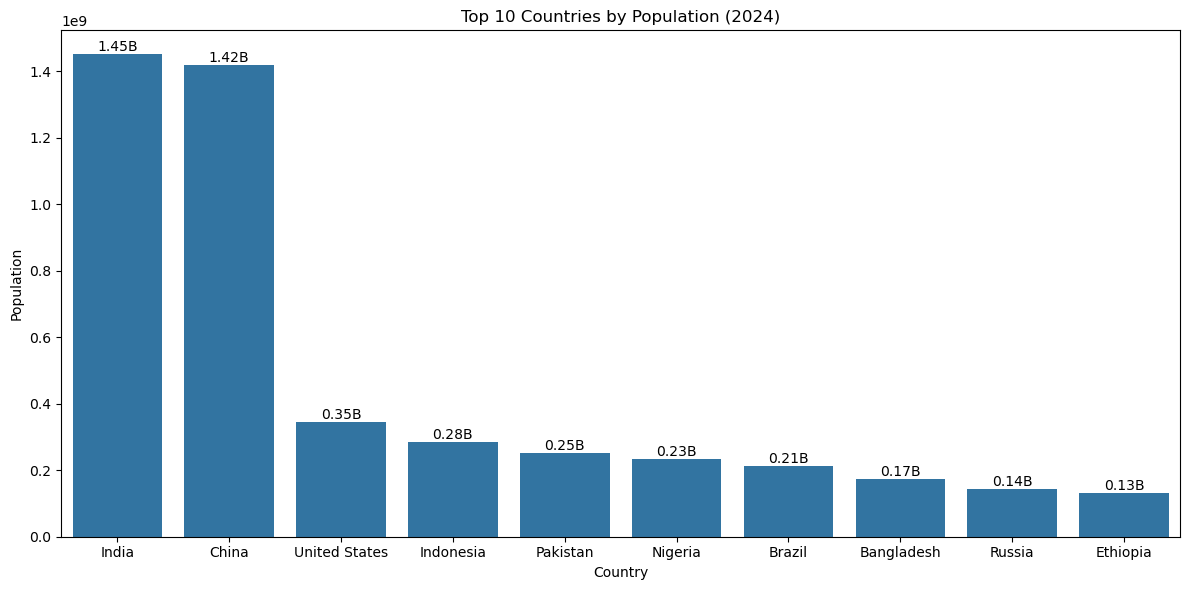

In [10]:
plt.figure(figsize=(12, 6))
top_10 = df.nlargest(10, 'Population (2024)')
ax = sns.barplot(x='Country', y='Population (2024)', data=top_10)
plt.title('Top 10 Countries by Population (2024)')
plt.xlabel('Country')
plt.ylabel('Population')

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    population_billions = top_10['Population (2024)'].iloc[i] / 1_000_000_000
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                              
        f'{population_billions:.2f}B',      
        ha='center',                        
        va='bottom'                       
    )

plt.tight_layout()
plt.show()

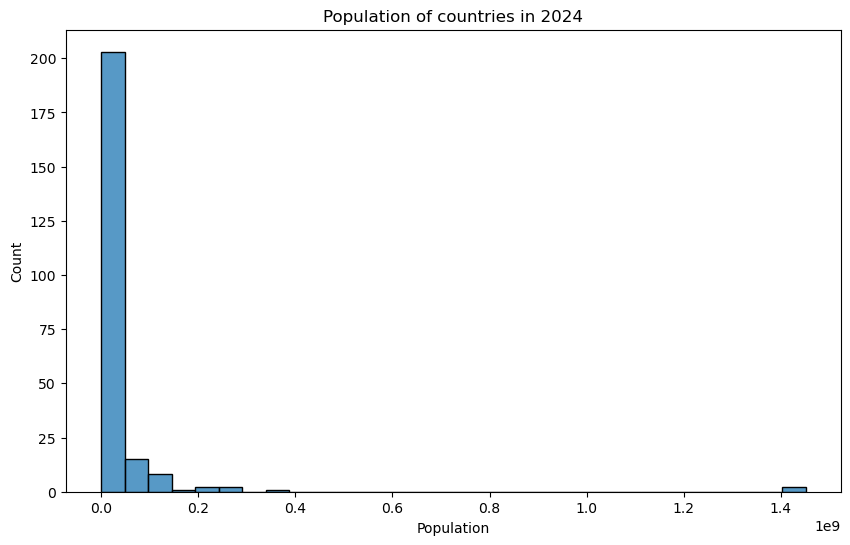

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Population (2024)'], bins=30)
plt.title('Population of countries in 2024')
plt.xlabel('Population')
plt.ylabel('Count')
plt.show()

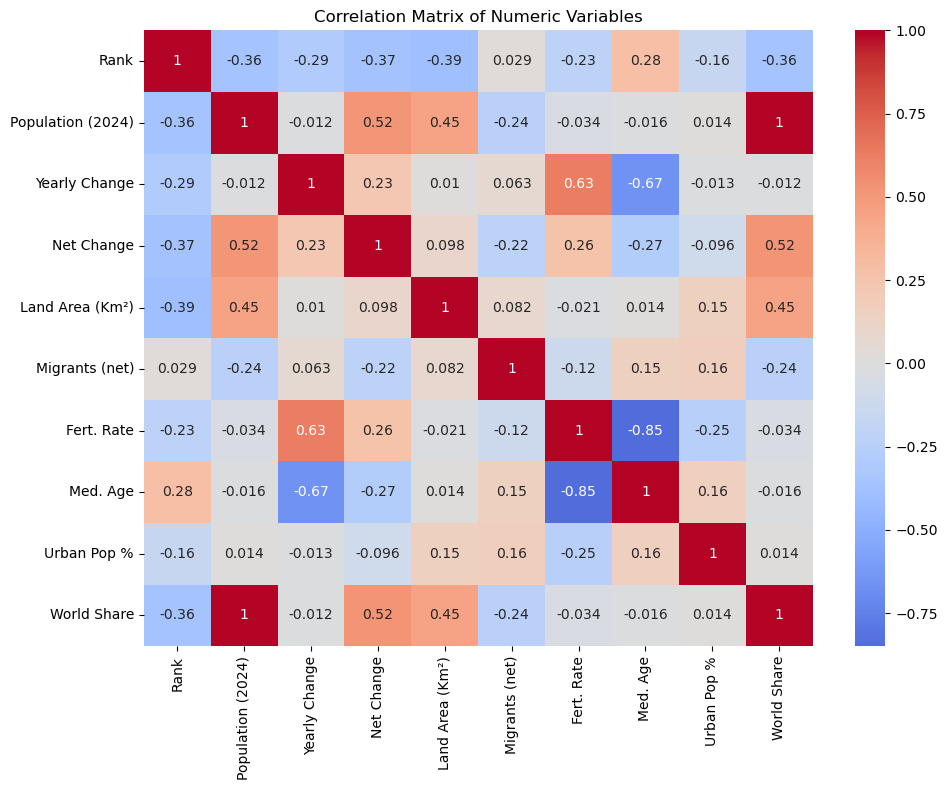

In [12]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

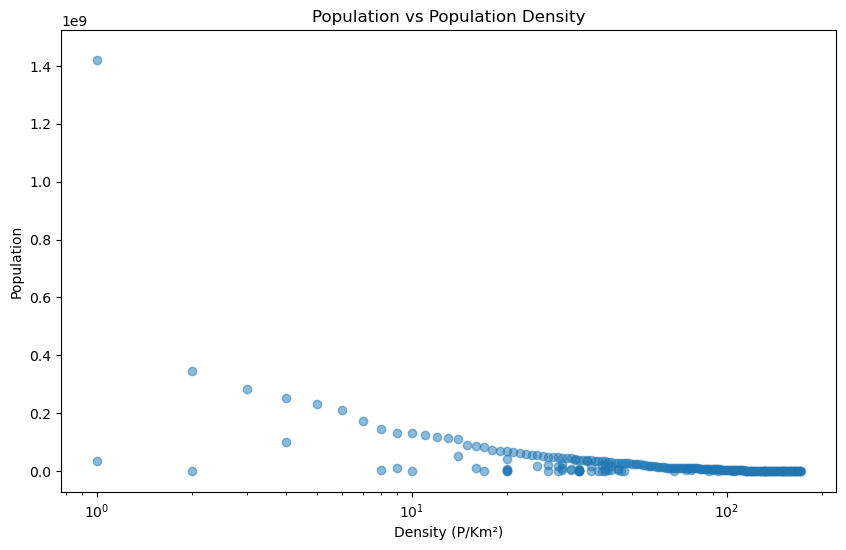

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Density (P/Km²)'], df['Population (2024)'], alpha=0.5)
plt.title('Population vs Population Density')
plt.xlabel('Density (P/Km²)')
plt.ylabel('Population')
plt.xscale('log')  
plt.show()

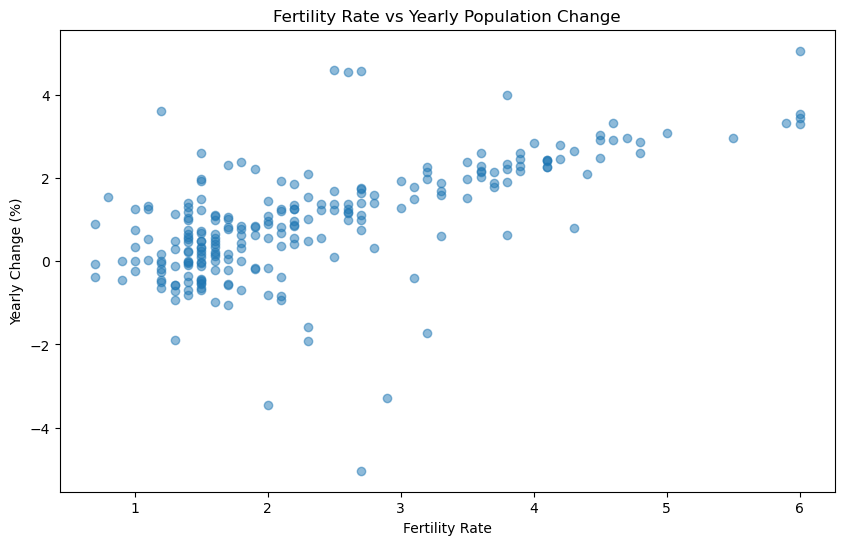

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fert. Rate'], df['Yearly Change'], alpha=0.5)
plt.title('Fertility Rate vs Yearly Population Change')
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly Change (%)')
plt.show()

In [15]:
print("\nTop 10 Countries by Population Growth Rate:")
print(df.nlargest(10, 'Yearly Change')[['Country', 'Yearly Change']])


Top 10 Countries by Population Growth Rate:
                      Country  Yearly Change
64                       Chad           5.07
122                      Oman           4.60
56                      Syria           4.57
231                   Tokelau           4.55
80                South Sudan           4.01
85       United Arab Emirates           3.62
67                    Somalia           3.54
121  Central African Republic           3.46
53                      Niger           3.34
182                   Mayotte           3.32


In [16]:
print("\nTop 10 Countries by Population Density:")
df['Density (P/Km²)'] = pd.to_numeric(df['Density (P/Km²)'].astype(str).str.replace(',', ''), errors='coerce')
print(df.nlargest(10, 'Density (P/Km²)')[['Country', 'Density (P/Km²)']])


Top 10 Countries by Population Density:
        Country  Density (P/Km²)
215      Monaco            25927
166       Macao            24009
114   Singapore             8332
104   Hong Kong             7062
214   Gibraltar             3933
152     Bahrain             2115
172    Maldives             1759
171       Malta             1686
7    Bangladesh             1333
204     Bermuda             1293


In [17]:
print("\nTop 10 Countries with Negative Population Growth:")
df['Yearly Change'] = pd.to_numeric(df['Yearly Change'].astype(str).str.replace('%', ''), errors='coerce')
negative_growth = df[df['Yearly Change'] < 0].nsmallest(10, 'Yearly Change')[['Country', 'Yearly Change']]
print(negative_growth)


Top 10 Countries with Negative Population Growth:
                      Country  Yearly Change
219              Saint Martin          -5.04
222              Cook Islands          -3.47
216          Marshall Islands          -3.29
210  Northern Mariana Islands          -1.92
94                     Greece          -1.90
226                    Tuvalu          -1.73
208            American Samoa          -1.59
137                   Moldova          -1.05
228              Saint Helena          -0.98
199       U.S. Virgin Islands          -0.93


In [18]:
df['Population (2025)'] = df['Population (2024)'] * (1 + df['Yearly Change'] / 100)

In [19]:
top_10_pop_2025 = df.nlargest(10, 'Population (2025)')[['Country', 'Population (2025)']]

In [20]:
top_10_growth_2025 = df.nlargest(10, 'Yearly Change')[['Country', 'Yearly Change']]

In [21]:
top_10_negative_2025 = df[df['Yearly Change'] < 0].nsmallest(10, 'Yearly Change')[['Country', 'Yearly Change']]

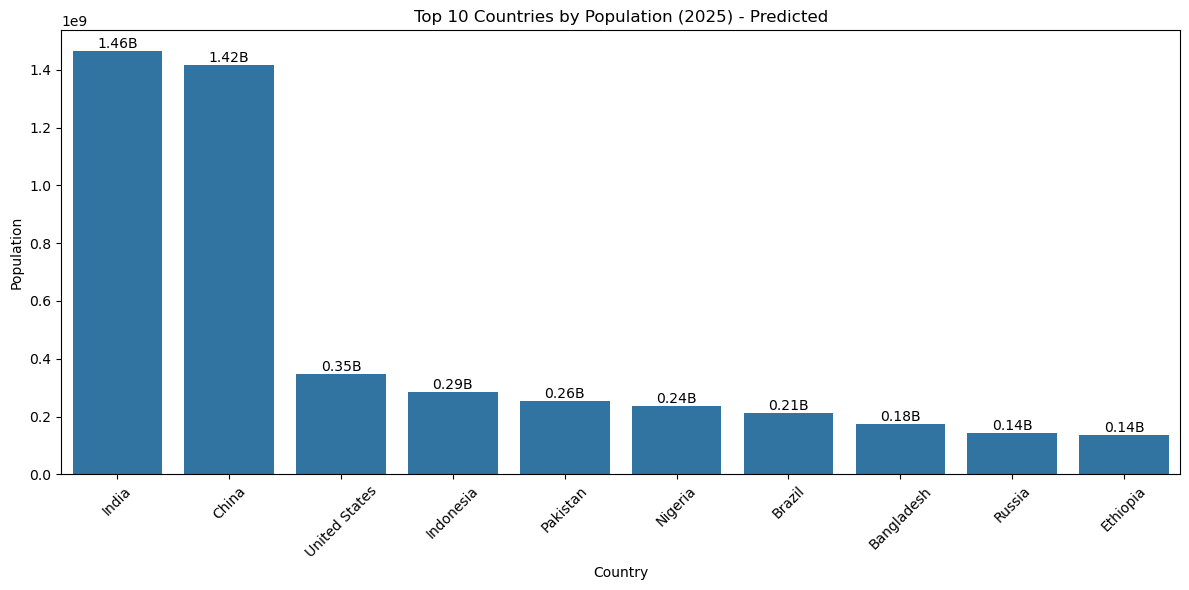

In [22]:
top_10_pop_2025['Population (Billions)'] = top_10_pop_2025['Population (2025)'] / 1_000_000_000
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Population (2025)', data=top_10_pop_2025)
plt.xticks(rotation=45)
plt.title('Top 10 Countries by Population (2025) - Predicted')
plt.xlabel('Country')
plt.ylabel('Population')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    billions = top_10_pop_2025['Population (Billions)'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                           
        f'{billions:.2f}B',                
        ha='center',                       
        va='bottom'                         
    )

plt.tight_layout()
plt.show()

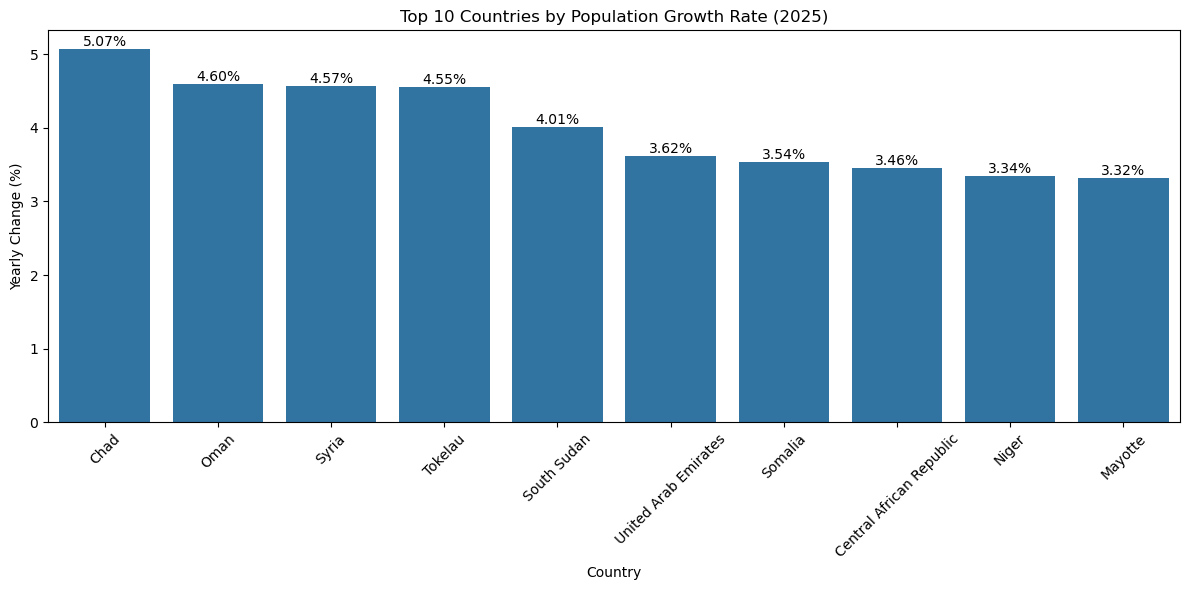

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Yearly Change', data=top_10_growth_2025)
plt.title('Top 10 Countries by Population Growth Rate (2025)')
plt.xlabel('Country')
plt.ylabel('Yearly Change (%)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    growth_rate = top_10_growth_2025['Yearly Change'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                             
        f'{growth_rate:.2f}%',              
        ha='center',                        
        va='bottom' if height >= 0 else 'top' 
    )

plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

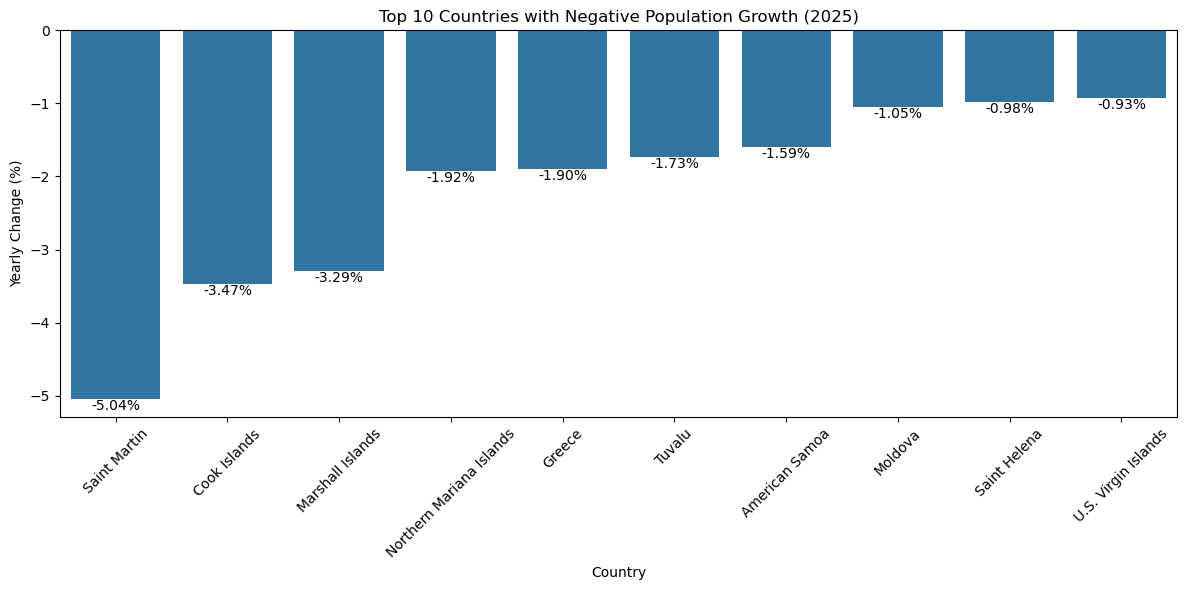

In [24]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country', y='Yearly Change', data=top_10_negative_2025)
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Negative Population Growth (2025)')
plt.xlabel('Country')
plt.ylabel('Yearly Change (%)')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    growth_rate = top_10_negative_2025['Yearly Change'].iloc[i]
    ax.text(
        bar.get_x() + bar.get_width() / 2,  
        height,                              
        f'{growth_rate:.2f}%',              
        ha='center',                        
        va='top' if height < 0 else 'bottom'  
    )

plt.tight_layout()
plt.show()

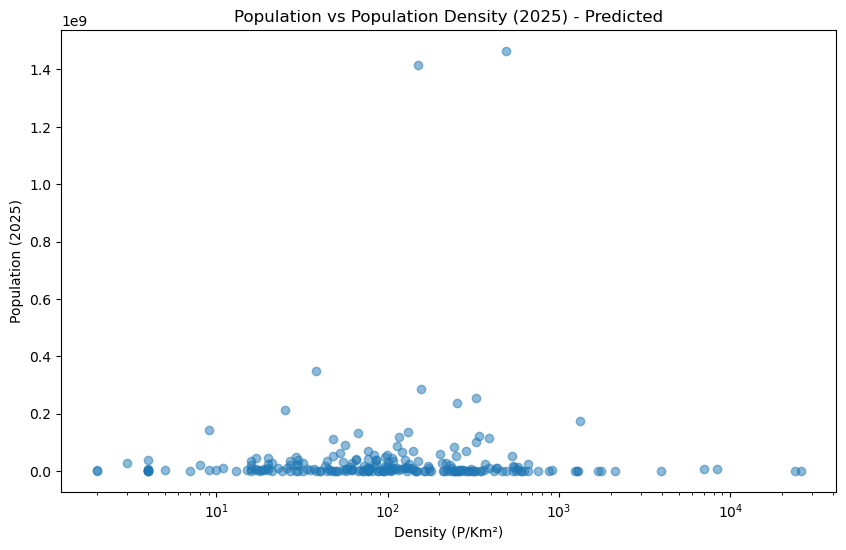

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Density (P/Km²)'], df['Population (2025)'], alpha=0.5)
plt.title('Population vs Population Density (2025) - Predicted')
plt.xlabel('Density (P/Km²)')
plt.ylabel('Population (2025)')
plt.xscale('log')  # Log scale for density due to wide range
plt.show()

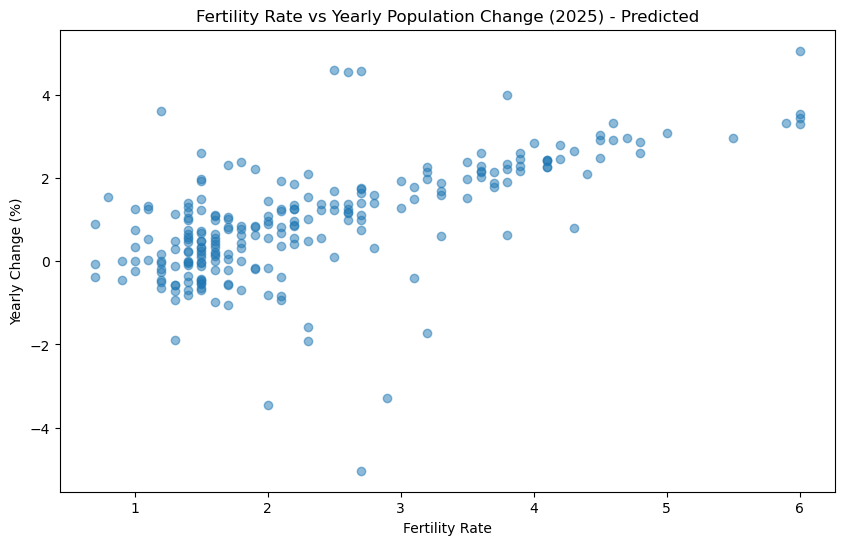

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Fert. Rate'], df['Yearly Change'], alpha=0.5)
plt.title('Fertility Rate vs Yearly Population Change (2025) - Predicted')
plt.xlabel('Fertility Rate')
plt.ylabel('Yearly Change (%)')
plt.show()

In [25]:
print("\nTop 10 Countries by Population in 2025 (Predicted):")
print(top_10_pop_2025)


Top 10 Countries by Population in 2025 (Predicted):
         Country  Population (2025)  Population (Billions)
0          India       1.463849e+09               1.463849
1          China       1.416057e+09               1.416057
2  United States       3.473955e+08               0.347396
3      Indonesia       2.858125e+08               0.285813
4       Pakistan       2.550885e+08               0.255088
5        Nigeria       2.375657e+08               0.237566
6         Brazil       2.128678e+08               0.212868
7     Bangladesh       1.756798e+08               0.175680
8         Russia       1.441977e+08               0.144198
9       Ethiopia       1.355197e+08               0.135520


In [26]:
print("\nTop 10 Countries by Population Growth Rate in 2025:")
print(top_10_growth_2025)


Top 10 Countries by Population Growth Rate in 2025:
                      Country  Yearly Change
64                       Chad           5.07
122                      Oman           4.60
56                      Syria           4.57
231                   Tokelau           4.55
80                South Sudan           4.01
85       United Arab Emirates           3.62
67                    Somalia           3.54
121  Central African Republic           3.46
53                      Niger           3.34
182                   Mayotte           3.32


In [27]:
print("\nTop 10 Countries with Negative Population Growth in 2025:")
print(top_10_negative_2025)


Top 10 Countries with Negative Population Growth in 2025:
                      Country  Yearly Change
219              Saint Martin          -5.04
222              Cook Islands          -3.47
216          Marshall Islands          -3.29
210  Northern Mariana Islands          -1.92
94                     Greece          -1.90
226                    Tuvalu          -1.73
208            American Samoa          -1.59
137                   Moldova          -1.05
228              Saint Helena          -0.98
199       U.S. Virgin Islands          -0.93


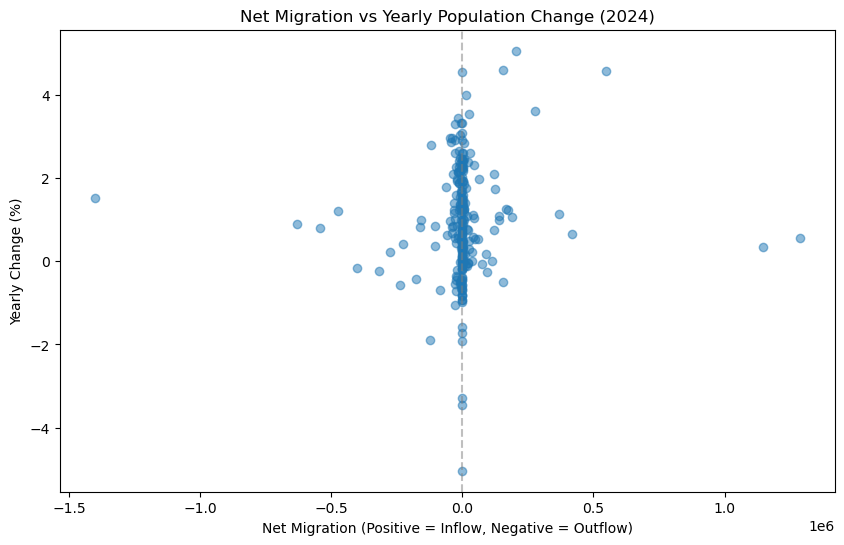


Correlation between Net Migration and Yearly Change:
0.06303136640301177


In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Migrants (net)'], df['Yearly Change'], alpha=0.5)
plt.title('Net Migration vs Yearly Population Change (2024)')
plt.xlabel('Net Migration (Positive = Inflow, Negative = Outflow)')
plt.ylabel('Yearly Change (%)')
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5)  
plt.show()
print("\nCorrelation between Net Migration and Yearly Change:")
print(df['Migrants (net)'].corr(df['Yearly Change']))

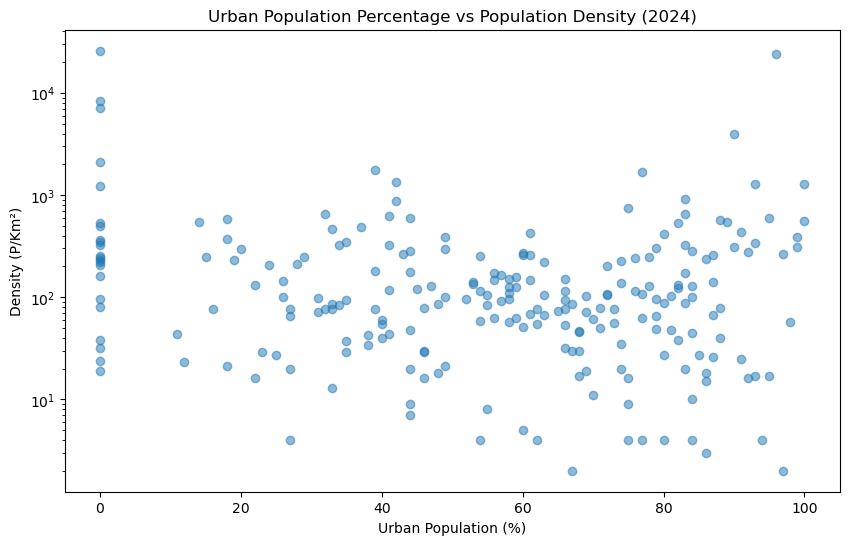


Correlation between Urban Pop % and Density:
-0.08233545595745873


In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Urban Pop %'], df['Density (P/Km²)'], alpha=0.5)
plt.title('Urban Population Percentage vs Population Density (2024)')
plt.xlabel('Urban Population (%)')
plt.ylabel('Density (P/Km²)')
plt.yscale('log')  # Log scale for density due to wide range
plt.show()
print("\nCorrelation between Urban Pop % and Density:")
print(df['Urban Pop %'].corr(df['Density (P/Km²)']))

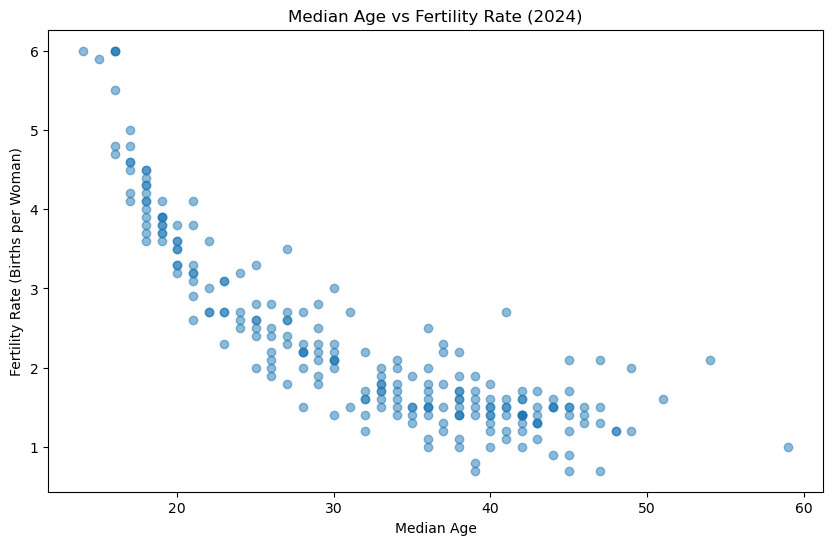


Correlation between Median Age and Fertility Rate:
-0.849637296157697


In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Med. Age'], df['Fert. Rate'], alpha=0.5)
plt.title('Median Age vs Fertility Rate (2024)')
plt.xlabel('Median Age')
plt.ylabel('Fertility Rate (Births per Woman)')
plt.show()
print("\nCorrelation between Median Age and Fertility Rate:")
print(df['Med. Age'].corr(df['Fert. Rate']))

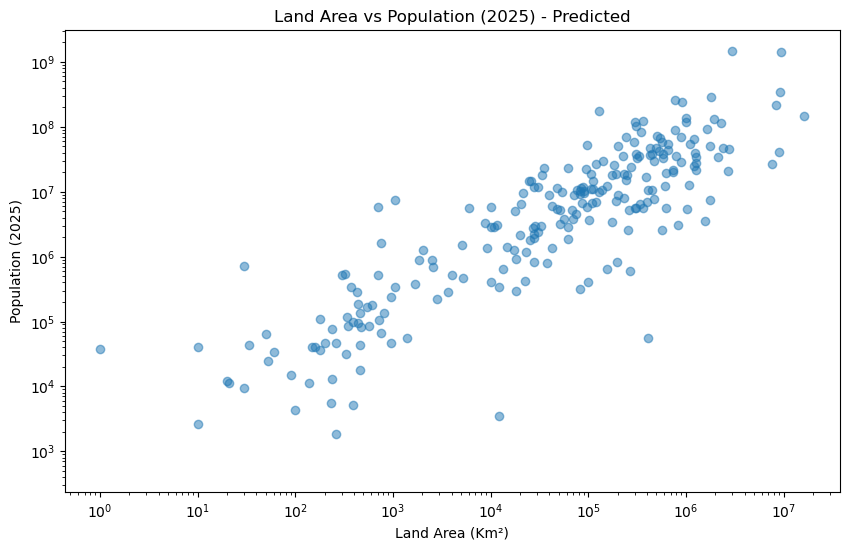


Correlation between Land Area and Population (2025):
0.44872396908612044


In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Land Area (Km²)'], df['Population (2025)'], alpha=0.5)
plt.title('Land Area vs Population (2025) - Predicted')
plt.xlabel('Land Area (Km²)')
plt.ylabel('Population (2025)')
plt.xscale('log')  # Log scale for land area
plt.yscale('log')  # Log scale for population
plt.show()
print("\nCorrelation between Land Area and Population (2025):")
print(df['Land Area (Km²)'].corr(df['Population (2025)']))

In [34]:
print("\nTop 10 Countries by Positive Net Migration (2024):")
top_migration_in = df.nlargest(10, 'Migrants (net)')[['Country', 'Migrants (net)']]
print(top_migration_in)


Top 10 Countries by Positive Net Migration (2024):
                 Country  Migrants (net)
2          United States       1286132.0
41               Ukraine       1146012.0
56                 Syria        546494.0
20        United Kingdom        417114.0
37                Canada        368599.0
85  United Arab Emirates        278439.0
64                  Chad        204040.0
16                  Iran        190156.0
43              Malaysia        174770.0
23          South Africa        166972.0


In [35]:
print("\nTop 10 Countries by Negative Net Migration (2024):")
top_migration_out = df.nsmallest(10, 'Migrants (net)')[['Country', 'Migrants (net)']]
print(top_migration_out)


Top 10 Countries by Negative Net Migration (2024):
       Country  Migrants (net)
4     Pakistan      -1401173.0
0        India       -630830.0
29       Sudan       -544257.0
7   Bangladesh       -473362.0
50       Nepal       -401282.0
1        China       -318992.0
17      Turkey       -275952.0
38      Poland       -238062.0
6       Brazil       -225510.0
8       Russia       -178042.0


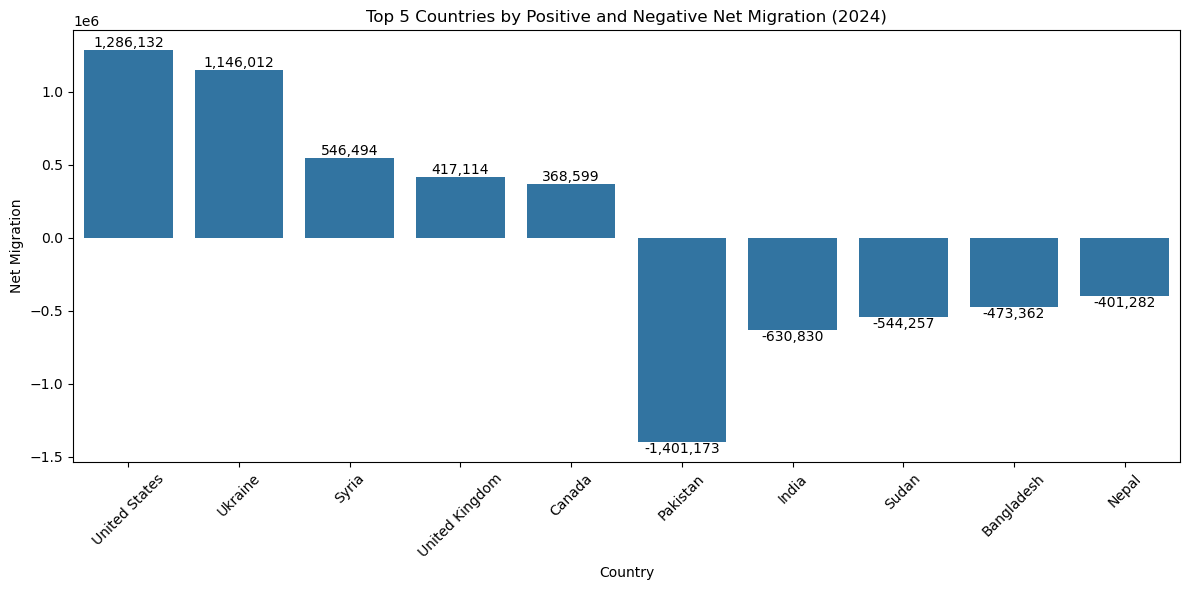

In [36]:
plt.figure(figsize=(12, 6))
top_migration = pd.concat([top_migration_in.head(5), top_migration_out.head(5)])
ax = sns.barplot(x='Country', y='Migrants (net)', data=top_migration)
plt.xticks(rotation=45)
plt.title('Top 5 Countries by Positive and Negative Net Migration (2024)')
plt.xlabel('Country')
plt.ylabel('Net Migration')
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom' if height > 0 else 'top'
    )
plt.tight_layout()
plt.show()